# **📦 Gerekli Kütüphanelerin Yüklenmesi**

In [1]:
# Temel veri işleme ve görselleştirme kütüphaneleri
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelleme
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ayarlar
import warnings
warnings.filterwarnings("ignore")

# Görselleştirme için stil
sns.set(style="whitegrid")


# **🗂️Veri Setini Yükleme**

In [2]:
# Dosya yolu Kaggle ortamında belirtilmiş
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

# İlk 5 satırı görüntüle
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **📊Veri Setinin Genel Bilgileri**

In [3]:
# Veri tipi, eksik değer, istatistiksel özet
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# **📉Eksik Veri ve Dağılım Analizi**

Eksik değer sayısı:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


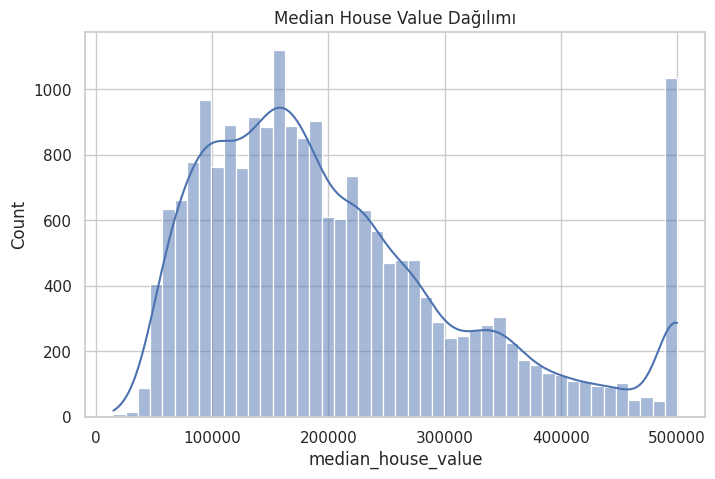

In [4]:
# Eksik değer kontrolü
print("Eksik değer sayısı:\n", df.isnull().sum())

# Hedef değişkenin dağılımı
plt.figure(figsize=(8, 5))
sns.histplot(df["median_house_value"], kde=True)
plt.title("Median House Value Dağılımı")
plt.show()


# **🧹Veri Ön İşleme**

In [5]:
# 'ocean_proximity' kategorik, one-hot encoding yapacağız
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Eksik satırları temizle
df.dropna(inplace=True)

# Girdi ve hedef ayrımı
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Eğitim ve test kümesine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **🌲Random Forest Modeli Eğitimi**

In [6]:
# Modeli oluştur
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Tahminler
y_pred = model.predict(X_test)


# **📈Model Değerlendirme**

In [7]:
# Değerlendirme metrikleri
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")


MAE: 31677.92
MSE: 2378317289.57
RMSE: 48767.99
R^2: 0.83


# **🔍Önemli Özellikler (Feature Importances)**

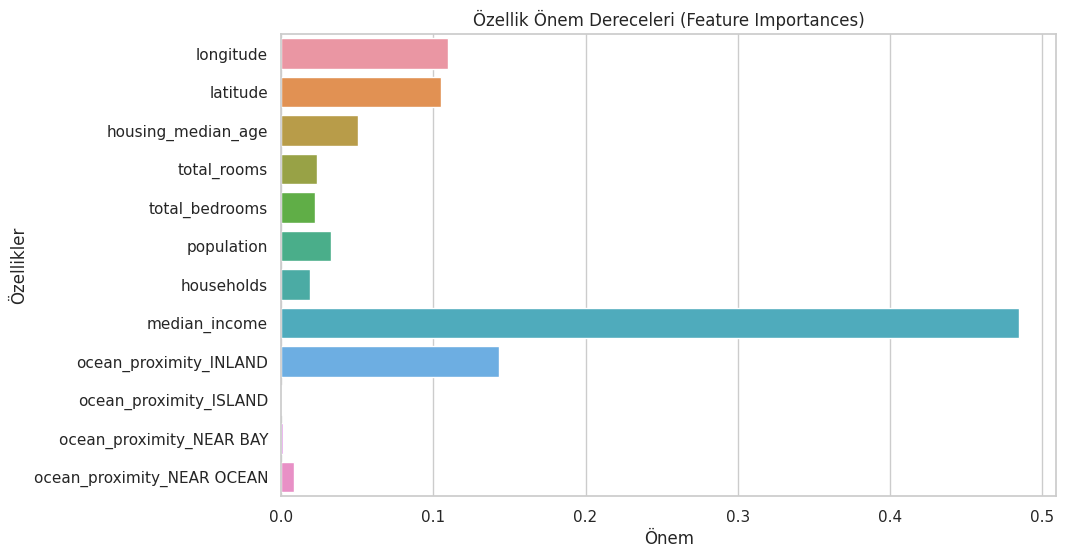

In [8]:
# Özellik önem dereceleri
importances = model.feature_importances_
feat_names = X.columns

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feat_names)
plt.title("Özellik Önem Dereceleri (Feature Importances)")
plt.xlabel("Önem")
plt.ylabel("Özellikler")
plt.show()


# **🔁Hiperparametre Optimizasyonu (GridSearchCV)**

In [9]:
from sklearn.model_selection import GridSearchCV

# Parametre arama aralığı
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# GridSearchCV ile en iyi parametreleri bulma
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=1,
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# En iyi parametreler
print("En iyi parametreler:", grid_search.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
En iyi parametreler: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


# **🔁Seçilen En İyi Model ile Test Verisini Değerlendirme**

In [13]:
# En iyi modeli al
best_rf_model = grid_search.best_estimator_

# Tahmin ve değerlendirme
y_pred_best = best_rf_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Hiperparametre Optimizasyonlu Model Sonuçları:")
print("MAE:", mae_best)
print("RMSE:", np.sqrt(mse_best))
print("R² Score:", r2_best)


Hiperparametre Optimizasyonlu Model Sonuçları:
MAE: 31677.918808416933
RMSE: 48767.9945206636
R² Score: 0.8260851299316047
